In [3]:
import json

def get_batch(i, country_of_origin_id="US", title_type='Movie', exclude_countries=None):
    movie_titles = []
    ratings = []
    runtimes = []
    release_years = []
    with open(f"movie_dataset/movie_dataset/movies_batch_{i}.json") as f:
        titles = json.load(f)
        for title in titles:
            if title['titleType'] is None:
                continue
            if not title['titleType']['text'] == title_type:
                continue
            if title['countriesOfOrigin'] is None:
                continue
            if not country_of_origin_id in [country_metadata['id'] for country_metadata in title['countriesOfOrigin']['countries']]:
                continue
            for exclude_country in exclude_countries:
                if exclude_country in [country_metadata['id'] for country_metadata in title['countriesOfOrigin']['countries']]:
                    continue
            
            # _imdb_id = title['id']
            # _batch_number = i
            _movie_title = title['titleText']['text']
            _rating = title['ratingsSummary']['aggregateRating']
            _runtime = None if title['runtime'] is None else title['runtime']['seconds']
            _release_year = None if title['releaseYear'] is None else title['releaseYear']['year']            

            if _movie_title is None or _rating is None or _runtime is None or _release_year is None:
                continue

            movie_titles.append(_movie_title)
            ratings.append(_rating)
            runtimes.append(_runtime)
            release_years.append(_release_year)
        
        return {
            'movie_titles': movie_titles,
            'ratings': ratings, 
            'runtimes': runtimes, 
            'release_years': release_years,
        }

def get_batches(batch_numbers: list, country_of_origin_id="US", exclude_countries=None):
    metadata = {
        'movie_titles': [],
        'ratings': [],
        'runtimes': [],
        'release_years': [],
    }
    for batch_number in batch_numbers:
        batch_metadata = get_batch(batch_number, country_of_origin_id=country_of_origin_id, exclude_countries=exclude_countries)
        metadata['movie_titles'] += batch_metadata['movie_titles']
        metadata['ratings'] += batch_metadata['ratings']
        metadata['runtimes'] += batch_metadata['runtimes']
        metadata['release_years'] += batch_metadata['release_years']
    
    return metadata

In [2]:
import json
us_movie_data = get_batches([i for i in range(1, 714)], country_of_origin_id="US", exclude_countries=[])
with open('american_movie_data.json', 'w') as f:
    json.dump(us_movie_data, f)

NameError: name 'get_batches' is not defined

In [ ]:
# import json
# uk_movie_data = get_batches([i for i in range(1, 714)], country_of_origin_id="GB", exclude_countries=[])
# with open('united_kingdom_movie_data.json', 'w') as f:
#     json.dump(uk_movie_data, f)

In [ ]:
# import json
# german_movie_data = get_batches([i for i in range(1, 714)], country_of_origin_id="DE", exclude_countries=[])
# with open('german_movie_data.json', 'w') as f:
#     json.dump(german_movie_data, f)

In [ ]:
import json
japanese_movie_data = get_batches([i for i in range(1, 714)], country_of_origin_id="JP", exclude_countries=["IN", "US"])
with open('japanese_movie_data.json', 'w') as f:
    json.dump(japanese_movie_data, f)

In [6]:
import json
indian_movie_data = get_batches([i for i in range(1, 714)], country_of_origin_id="IN", exclude_countries=["JP", "US"])
with open('indian_movie_data.json', 'w') as f:
    json.dump(indian_movie_data, f)

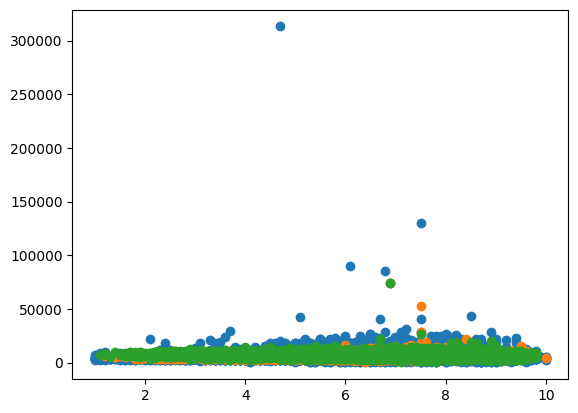

In [4]:
import matplotlib.pyplot as plt
_american_movie_data = None
with open('american_movie_data.json', 'r') as file:
    _american_movie_data = json.load(file)
    file.close()
with open('japanese_movie_data.json', 'r') as file:
    _japanese_movie_data = json.load(file)
    file.close()
with open('indian_movie_data.json', 'r') as file:
    _indian_movie_data = json.load(file)
    file.close()

american_release_years = _american_movie_data['release_years']
american_ratings = _american_movie_data['ratings']
america_runtimes = _american_movie_data['runtimes']

japanese_release_years = _japanese_movie_data['release_years']
japanese_ratings = _japanese_movie_data['ratings']
japanese_runtimes = _japanese_movie_data['runtimes']

indian_release_years = _indian_movie_data['release_years']
indian_ratings = _indian_movie_data['ratings']
indian_runtimes = _indian_movie_data['runtimes']

plt.scatter(american_ratings, america_runtimes)
plt.scatter(japanese_ratings, japanese_runtimes)
plt.scatter(indian_ratings, indian_runtimes)

In [7]:
len(america_runtimes)
len(japanese_runtimes)
len(indian_runtimes)

22976

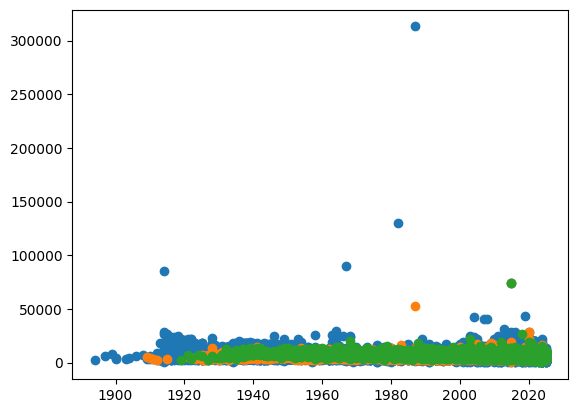

In [8]:
plt.scatter(american_release_years, america_runtimes)
plt.scatter(japanese_release_years, japanese_runtimes)
plt.scatter(indian_release_years, indian_runtimes)

In [9]:
def data_by_years(data, start_year=1900, stop_year=1925):
    filtered_data = {k:[] for k in data.keys()}
    release_years = data['release_years']
    valid_years = [i for i in range(start_year, stop_year)]
    for i, release_year in enumerate(release_years):
        if release_year not in valid_years:
            continue
        for k, v in data.items():
            filtered_data[k].append(v[i])
    
    return filtered_data

import random
def data_by_random_sample(data, N):
    num_data_points = len(data[list(data.keys())[0]])
    sample_indices = random.sample([i for i in range(num_data_points)], min(N, num_data_points))
    filtered_data = {k:[] for k in data.keys()}
    for k, v in data.items():
        filtered_data[k] = [v[i] for i in sample_indices]

    return filtered_data

In [10]:
import matplotlib.pyplot as plt

movie_data_1900 = data_by_random_sample(data_by_years(_movie_data, start_year=1900, stop_year=1925), 30)
movie_data_1925 = data_by_random_sample(data_by_years(_movie_data, start_year=1925, stop_year=1950), 30)
movie_data_1950 = data_by_random_sample(data_by_years(_movie_data, start_year=1950, stop_year=1975), 30)
movie_data_1975 = data_by_random_sample(data_by_years(_movie_data, start_year=1975, stop_year=2000), 30)
movie_data_2000 = data_by_random_sample(data_by_years(_movie_data, start_year=2000, stop_year=2025), 30)
movie_data_2025 = data_by_random_sample(data_by_years(_movie_data, start_year=2025, stop_year=2050), 30)

plt.scatter(movie_data_1900['release_years'], movie_data_1900['runtimes'])
plt.scatter(movie_data_1925['release_years'], movie_data_1925['runtimes'])
plt.scatter(movie_data_1950['release_years'], movie_data_1950['runtimes'])
plt.scatter(movie_data_1975['release_years'], movie_data_1975['runtimes'])
plt.scatter(movie_data_2000['release_years'], movie_data_2000['runtimes'])
plt.scatter(movie_data_2025['release_years'], movie_data_2025['runtimes'])

NameError: name '_movie_data' is not defined

In [11]:
plt.scatter(movie_data_1900['release_years'], movie_data_1900['ratings'])
plt.scatter(movie_data_1925['release_years'], movie_data_1925['ratings'])
plt.scatter(movie_data_1950['release_years'], movie_data_1950['ratings'])
plt.scatter(movie_data_1975['release_years'], movie_data_1975['ratings'])
plt.scatter(movie_data_2000['release_years'], movie_data_2000['ratings'])
plt.scatter(movie_data_2025['release_years'], movie_data_2025['ratings'])

NameError: name 'movie_data_1900' is not defined

In [12]:
plt.scatter(movie_data_1900['ratings'], movie_data_1900['runtimes'])
plt.scatter(movie_data_1925['ratings'], movie_data_1925['runtimes'])
plt.scatter(movie_data_1950['ratings'], movie_data_1950['runtimes'])
plt.scatter(movie_data_1975['ratings'], movie_data_1975['runtimes'])
plt.scatter(movie_data_2000['ratings'], movie_data_2000['runtimes'])
plt.scatter(movie_data_2025['ratings'], movie_data_2025['runtimes'])

NameError: name 'movie_data_1900' is not defined

In [13]:
import numpy as np
def get_labeled_features_years(data, period=20, start_year=1900, end_year=2050, N=30, feature_types=['ratings', 'runtimes']):
    X = []
    y = []
    start_years = [year for year in range(start_year, end_year, period)]
    for _start_year in start_years:
        film_data = data_by_random_sample(data_by_years(data, start_year=_start_year, stop_year=_start_year+period), N)
        num_data_points = len(film_data['release_years'])
        new_features = [[film_data[feature_type][i] for feature_type in feature_types] for i in range(num_data_points)]
        X += new_features
        y += [_start_year]*num_data_points
    
    return X, y

def get_labeled_features_countries(datas, countries, feature_types=['ratings', 'runtimes'], N=20):
    X = []
    y = []
    for data, country in zip(datas, countries):
        film_data = data_by_random_sample(data, N)
        num_data_points = len(film_data['release_years'])
        new_features = [[film_data[feature_type][j] for feature_type in feature_types] for j in range(num_data_points)]
        X += new_features
        y += [country]*num_data_points
    
    return X, y

In [35]:
# X, y = get_labeled_features_years(_american_movie_data, period=50, N=50)
X, y = get_labeled_features_countries([_american_movie_data, _japanese_movie_data, _indian_movie_data], ["America", "Japan", "India"], N=500)

In [36]:
training_index = int(0.9*len(X))
X_train = np.array(X[:training_index])
X_test = np.array(X[training_index:])
y_train = y[:training_index]
y_test = y[training_index:]

In [37]:
len(X)
len(y)

1500

In [38]:
len(y_train)

1350

In [39]:
len(X_train)
len(y_train)

1350

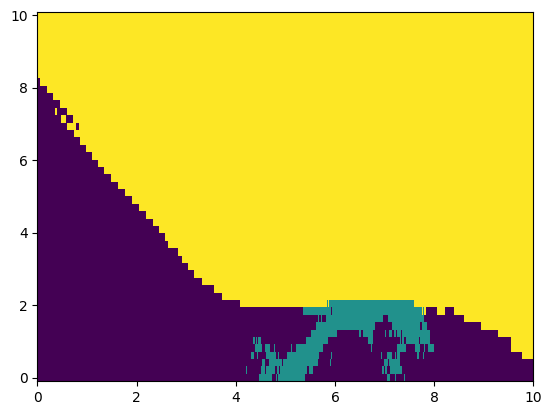

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
import numpy as np


X_normalized = [[x[0], x[1]/3600] for x in X_train]

classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_normalized, np.array([0 if _y == "America" else 1 if _y == "Japan" else 2 if _y == "India" else None for _y in np.array(y_train)]))

from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(np.array(X_normalized), np.array([0 if _y == "America" else 1 if _y == "Japan" else 2 if _y == "India" else None for _y in np.array(y_train)]), clf=classifier)
# plot_decision_regions(np.array([[0.1,0.1], [1.0, 0.9]]), np.array([0, 1]), clf=classifier)

@np.vectorize
def calculate_z(a, b):
    return classifier.predict([[a, b]])[0]

N = 10000
X1, X2 = np.meshgrid(np.linspace(0, 10, N), np.linspace(0, 10))
Z = calculate_z(X1, X2)

plt.pcolormesh(X1, X2, Z)
# plt.scatter(np.array(X_normalized)[:, 0], np.array(X_normalized)[:,1])

In [118]:
[0 if _y == "America" else 1 if _y == "Japan" else 2 if _y == "India" else None for _y in np.array(y_train)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [54]:
import pickle as pkl

good_data = {
    "X": X,
    "y": y,
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test,
}

filename = "large_number_of_data_points1.pickle"
save = True
if save:
    with open(f"data_I_like/countries/{filename}", "wb") as f:
        pkl.dump(good_data, f)

    # with open(f"data_I_like/america/{filename}.pickle", "rb") as f:
    #     loaded_data = pkl.load(f)


<Axes: >

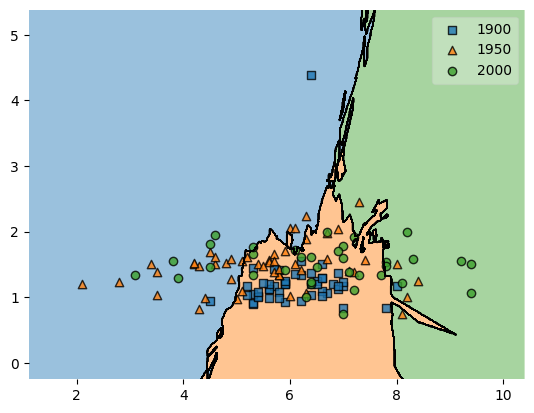

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
import numpy as np


X_normalized = [[x[0], x[1]/3600] for x in X_train]

classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_normalized, y_train)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_normalized), np.array(y_train), clf=classifier)

In [10]:
X_normalized

array([[1.69999754e-03, 9.99998555e-01],
       [1.66666435e-03, 9.99998611e-01],
       [1.23015780e-03, 9.99999243e-01],
       [2.23332776e-03, 9.99997506e-01],
       [1.50234572e-03, 9.99998871e-01],
       [1.43192341e-03, 9.99998975e-01],
       [5.89743487e-04, 9.99999826e-01],
       [1.45833178e-03, 9.99998937e-01],
       [1.51741119e-03, 9.99998849e-01],
       [1.74999732e-03, 9.99998469e-01],
       [1.39917559e-03, 9.99999021e-01],
       [1.39705746e-03, 9.99999024e-01],
       [1.29870020e-03, 9.99999157e-01],
       [1.89999657e-03, 9.99998195e-01],
       [1.33744736e-03, 9.99999106e-01],
       [1.56410065e-03, 9.99998777e-01],
       [2.22221674e-03, 9.99997531e-01],
       [1.74999732e-03, 9.99998469e-01],
       [9.16666282e-04, 9.99999580e-01],
       [1.51281878e-03, 9.99998856e-01],
       [1.16666587e-03, 9.99999319e-01],
       [1.44927384e-03, 9.99998950e-01],
       [1.35416543e-03, 9.99999083e-01],
       [1.43518371e-03, 9.99998970e-01],
       [1.322750

array([1950.])

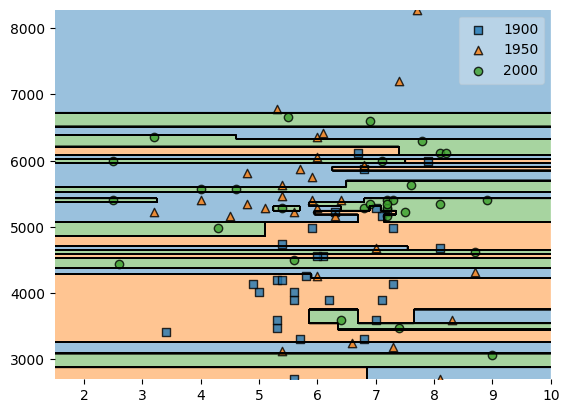

In [11]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
X, y = get_labeled_features(_movie_data)
regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X), np.array(y), clf=regressor)
regressor.predict([[4, 7000]])

In [12]:
data_by_decade(_movie_data, decade_start=1900)

NameError: name 'data_by_decade' is not defined

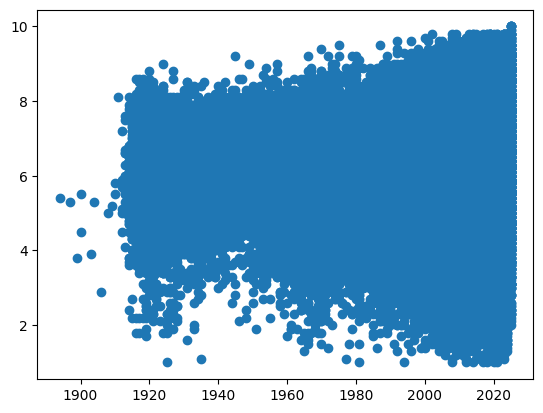

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(release_years, ratings)

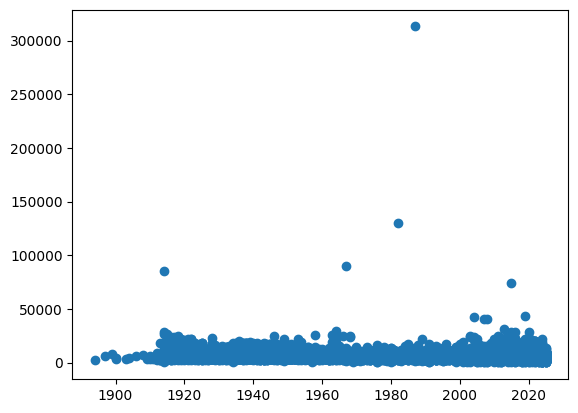

In [ ]:
plt.scatter(release_years, runtimes)

In [ ]:
len(movie_data['movie_titles'])

93735

In [ ]:
import json

with open('imdb_movie_metadata/movies_batch_1.json') as json_data:
    data = json.load(json_data)
    print(data[2]['titleText']['text'])
    print(data[2]['releaseYear']['year'])
    print(data[2]['runtime']['seconds'])
    print(data[2]['ratingsSummary']['aggregateRating'])
    print(d[2]['principalCredits']['credits'])

    json_data.close()

